In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import torch

In [16]:
def plot(x_gt, x_pred, edges, case, method):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    lw = 1.2

    ax.scatter(x_gt[...,0], x_gt[...,2], x_gt[...,1], color="r")
    ax.scatter(x_pred[...,0], x_pred[...,2], x_pred[...,1], color="b")

    for edge in edges:
        s_gt, t_gt = x_gt[edge]
        s_pred, t_pred = x_pred[edge]

        pos_gt = list(zip(s_gt, t_gt))

        pos_pred = list(zip(s_pred, t_pred))
        ax.plot(pos_gt[0], pos_gt[2], pos_gt[1], color='r', ls='-', linewidth=lw)
        ax.plot(pos_pred[0], pos_pred[2], pos_pred[1], color='b', ls='-', linewidth=lw)
    
    plt.savefig(f'../figures/{case}_{method}.svg')

In [17]:
# data.pkl can be collected using the evaluation script, simply by mannually saving data after testing.
# Important things for visualization: input pos (x_in), target pos (x_end), the prediction (x_gmn) 
case = 'basketball'
with open(f'../motion/motion_{case}.pkl', 'rb') as f:
    edges, X = pkl.load(f)

    
pivot = 87  # the index of the system to visualize
x_gt = X[6][pivot]
x_gt

array([[ 2.89214   , 14.2122    ,  3.97305   ],
       [ 1.22485606, 12.98083483,  2.76444173],
       [ 0.21139866,  8.39529898, -1.84608234],
       [-1.27927444,  2.09745796,  0.89071453],
       [-1.66196958,  1.3915119 , -1.03639789],
       [-1.61384518,  1.88432801, -1.96054222],
       [ 4.13805093, 12.22221705,  3.48453031],
       [ 2.45023566,  5.93868302,  2.01503787],
       [-1.55275766,  2.00248582,  6.77035367],
       [-1.02299383,  0.6809073 ,  5.02209527],
       [-0.72486434,  0.06651484,  4.11679199],
       [ 3.40831821, 16.32752357,  3.30845021],
       [ 3.7441897 , 18.20271358,  2.04430245],
       [ 3.97219174, 20.03264495,  0.65311009],
       [ 3.89881138, 21.0670656 , -0.27916438],
       [ 4.04438595, 22.3170056 , -0.89002872],
       [ 4.60017753, 23.5790434 , -1.22150053],
       [ 0.57568125, 21.14741644,  0.47475927],
       [-0.090978  , 16.47629637, -0.18279314],
       [ 0.48328856, 15.73423344, -3.17679239],
       [ 0.77042093, 15.36320316, -4.673

In [18]:
mse = 0.0749
bask_estag = np.array([[ 2.7486e+00,  1.4294e+01,  3.9931e+00],
        [ 1.2264e+00,  1.3064e+01,  2.8303e+00],
        [ 8.2873e-02,  8.2737e+00, -2.1508e+00],
        [-1.4290e+00,  2.3743e+00,  1.3732e+00],
        [-2.0930e+00,  1.5824e+00, -4.3942e-01],
        [-2.0425e+00,  1.8207e+00, -1.2552e+00],
        [ 4.0338e+00,  1.2451e+01,  3.3286e+00],
        [ 2.1580e+00,  6.2304e+00,  1.5822e+00],
        [-1.2258e+00,  2.1510e+00,  6.6691e+00],
        [-4.9904e-01,  7.5243e-01,  4.9117e+00],
        [-1.5585e-01,  5.3358e-01,  4.3378e+00],
        [ 3.4001e+00,  1.6433e+01,  3.2191e+00],
        [ 3.7919e+00,  1.8305e+01,  2.1393e+00],
        [ 3.9831e+00,  2.0124e+01,  8.2551e-01],
        [ 4.0215e+00,  2.1165e+01, -8.1027e-02],
        [ 4.1711e+00,  2.2403e+01, -7.0021e-01],
        [ 4.6326e+00,  2.3631e+01, -1.1651e+00],
        [ 7.1736e-01,  2.1237e+01,  8.5531e-01],
        [ 1.7560e-02,  1.6190e+01,  5.4348e-02],
        [ 7.1874e-01,  1.5711e+01, -2.8758e+00],
        [ 9.0157e-01,  1.5251e+01, -4.2919e+00],
        [ 7.2332e-01,  1.5164e+01, -4.9176e+00],
        [ 3.8169e-01,  1.4982e+01, -5.4214e+00],
        [ 9.1028e-01,  1.5086e+01, -5.0985e+00],
        [ 7.1680e+00,  2.0485e+01,  4.4067e-01],
        [ 6.3183e+00,  1.5878e+01,  8.8093e-01],
        [ 6.4174e+00,  1.2237e+01,  2.9384e-01],
        [ 6.3865e+00,  1.0264e+01,  1.2291e-01],
        [ 6.2352e+00,  9.9076e+00, -4.5664e-01],
        [ 6.0386e+00,  9.8379e+00, -7.5291e-01],
        [ 5.7362e+00,  1.0247e+01, -4.0625e-01]])
print(bask_estag.shape)

(31, 3)


In [19]:
mse = 2.6380
bask_egnn = np.array([[ 1.2007, 14.4831,  4.4171],
        [-0.3393, 13.0246,  3.0446],
        [-3.2824,  7.8405,  0.5798],
        [-4.1306,  1.5547,  4.1377],
        [-4.8248,  1.0208,  2.4772],
        [-4.7661,  1.5086,  1.6494],
        [ 2.2918, 12.1239,  3.1280],
        [ 1.9916,  5.5117,  1.5079],
        [-1.9027,  1.1494,  6.6967],
        [-0.9781,  0.5534,  4.8324],
        [-0.8835,  0.0240,  4.0439],
        [ 1.6254, 16.2680,  3.4016],
        [ 1.8153, 18.1736,  1.9920],
        [ 2.9210, 19.8104,  0.8245],
        [ 2.0001, 20.6759, -0.1259],
        [ 1.7939, 21.5750, -0.6500],
        [ 2.4131, 23.5618, -1.3285],
        [-1.3478, 21.2432,  0.9555],
        [-1.6971, 16.5188,  2.2364],
        [-1.4198, 15.5219, -0.6502],
        [-0.3037, 14.4966, -2.0597],
        [-1.1420, 14.5048, -2.4072],
        [-1.0071, 14.2249, -2.8187],
        [-0.6909, 14.6113, -2.4915],
        [ 5.5228, 20.5928,  0.6129],
        [ 4.7630, 15.0618,  1.4622],
        [ 4.1922, 12.3243,  0.1040],
        [ 3.7396, 10.7294,  0.7470],
        [ 2.7257, 10.2609, -0.3879],
        [ 3.1466, 10.3232, -0.0846],
        [ 2.5033, 10.8777,  0.2569]])
print(bask_estag.shape)

(31, 3)


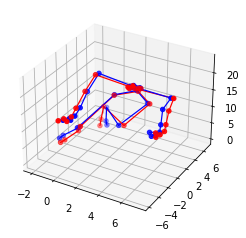

In [20]:
plot(x_gt, bask_estag, edges, case, 'estag')

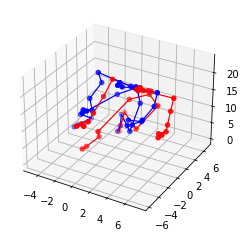

In [21]:
plot(x_gt, bask_egnn, edges, case, 'egnn')

In [22]:
# data.pkl can be collected using the evaluation script, simply by mannually saving data after testing.
# Important things for visualization: input pos (x_in), target pos (x_end), the prediction (x_gmn) 
# and the cfg (kinematics decomposition).
case = 'walk'
with open(f'../motion/motion_{case}.pkl', 'rb') as f:
    edges, X = pkl.load(f)

    
pivot = 87  # the index of the system to visualize
x_gt = X[6][pivot]
x_gt

array([[ 0.581796  , 17.7979    , -1.71409   ],
       [ 2.48188428, 16.03455643, -1.21861439],
       [ 1.90212502,  8.7830124 , -2.6290559 ],
       [ 1.38404364,  1.63136662, -6.00534109],
       [ 1.15815934,  0.81302853, -3.88220539],
       [ 1.07313128,  0.72310412, -2.74203232],
       [-0.87340992, 15.83500592, -1.12643062],
       [-0.55096704,  9.25448154,  2.68842487],
       [-0.62139711,  1.55591066,  4.83205577],
       [-0.89883454,  2.00620003,  7.11279381],
       [-1.0302473 ,  2.56857958,  8.12319652],
       [ 0.65947647, 19.82353103, -1.63606696],
       [ 0.69440826, 21.82893936, -1.32014648],
       [ 0.56497342, 23.870587  , -1.09940859],
       [ 0.53714175, 25.57636383, -1.29605398],
       [ 0.50187772, 27.31373979, -1.28212715],
       [ 0.37666668, 29.00318911, -0.86790129],
       [ 3.87262865, 25.10457514, -1.15565627],
       [ 5.00365867, 20.19696921, -0.61611089],
       [ 5.59554794, 17.42188119,  1.60259806],
       [ 5.89149258, 16.03433718,  2.711

In [23]:
mase = 0.0048
walk_estag = np.array([[ 0.6079, 17.8557, -1.6926],
        [ 2.4983, 16.0599, -1.1886],
        [ 1.9111,  8.7795, -2.6656],
        [ 1.3721,  1.6157, -6.0493],
        [ 1.1615,  0.8246, -3.9804],
        [ 1.0597,  0.7570, -2.7634],
        [-0.8539, 15.8254, -1.0930],
        [-0.4926,  9.2421,  2.5525],
        [-0.6035,  1.5284,  4.9682],
        [-0.9840,  2.0748,  7.3578],
        [-1.1744,  2.7862,  8.3053],
        [ 0.6728, 19.8222, -1.6213],
        [ 0.7055, 21.9000, -1.3373],
        [ 0.5722, 23.9508, -1.1356],
        [ 0.5594, 25.6730, -1.3181],
        [ 0.5099, 27.3884, -1.3045],
        [ 0.3871, 29.1026, -0.8609],
        [ 3.8867, 25.2056, -1.1819],
        [ 4.9884, 20.3186, -0.6307],
        [ 5.6348, 17.5259,  1.5937],
        [ 5.9619, 16.1376,  2.6940],
        [ 6.2764, 15.9165,  2.8914],
        [ 6.4899, 15.6854,  3.0277],
        [ 6.0936, 15.7485,  2.9755],
        [-2.9120, 24.5366, -2.1249],
        [-2.5172, 19.2129, -2.4355],
        [-3.0757, 15.8125, -1.3846],
        [-3.3421, 14.1061, -0.8840],
        [-3.6276, 13.6461, -0.5393],
        [-3.7864, 13.2694, -0.2171],
        [-3.3136, 13.6431, -0.3212]])
print(walk_estag.shape)

(31, 3)


In [24]:
mse = 0.0811
walk_egnn = np.array([[ 0.6363, 17.9302, -1.9260],
        [ 2.8982, 16.2179, -1.6984],
        [ 2.1558,  8.7406, -2.6964],
        [ 1.5274,  1.4241, -6.2815],
        [ 1.2559,  0.5340, -4.2089],
        [ 1.1016,  0.7953, -2.8047],
        [-0.8353, 15.8559, -1.6364],
        [-0.6897,  9.6115,  2.5461],
        [-0.6001,  1.4018,  4.0317],
        [-1.0333,  1.2298,  6.7705],        [-1.5684,  2.2507,  8.3540],        [ 0.8372, 19.9494, -1.8614],
        [ 0.6771, 21.9184, -1.3195],
        [ 0.6043, 23.8832, -1.2390],
        [ 0.6292, 25.6221, -1.4716],        [ 0.3757, 27.4822, -1.4156],
        [ 0.3562, 29.1535, -0.9577],
        [ 4.0175, 25.2402, -1.2801],
        [ 5.0584, 20.3227, -1.0334],
        [ 5.6153, 17.4126,  1.3869],
        [ 5.9342, 16.0259,  2.1713],
        [ 6.1452, 15.7147,  2.3123],
        [ 6.3784, 15.2686,  1.5864],
        [ 5.9655, 15.6709,  2.4247],
        [-2.9469, 24.5716, -2.2637],
        [-2.5420, 19.3376, -2.2230],
        [-3.2471, 15.7808, -1.5007],
        [-3.7329, 14.1772, -0.8741],
        [-3.7160, 13.7575, -0.3102],
        [-3.8362, 13.0688, -0.3240],
        [-3.3838, 13.7223, -0.1489]])
print(walk_egnn.shape)

(31, 3)


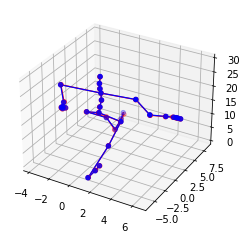

In [25]:
plot(x_gt, walk_estag, edges, case, 'estag')

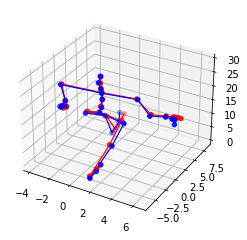

In [26]:
plot(x_gt, walk_egnn, edges, case, 'egnn')